In [150]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

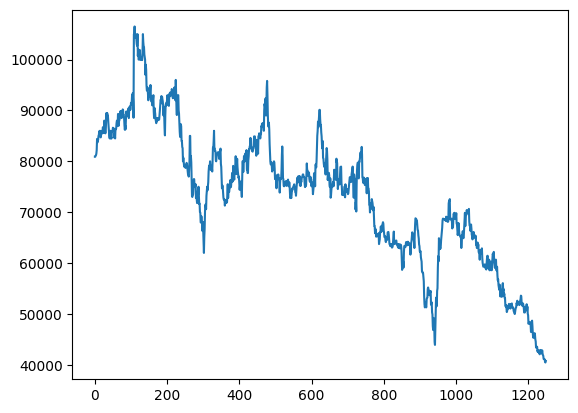

In [151]:
# 2. Đọc file csv và gắng index với giá Price
# data = pd.read_csv('VCB Historical Data.csv')
# df = pd.read_csv('ACB Historical Data.csv')
df = pd.read_csv('MBB Historical Data.csv')
df1=data.reset_index()['Price']

plt.plot(df1)

In [152]:
#đảo ngược dữ liệu
df1=df1.loc[::-1].reset_index(drop=True)
data=data.loc[::-1].reset_index(drop=True)

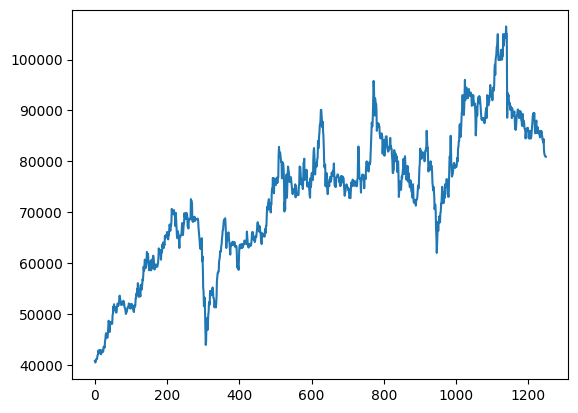

In [153]:
#ve do thi
plt.plot(df1)


In [154]:

# # tiền sử lý dataset
# train_size = int(len(data)*0.9);
# test_size = int(len(data)*0.1);

# df_train = df1[:train_size];
# df_test = df1[train_size:];




In [155]:

# # tiền sử lý dataset
# train_size = int(len(data)*0.8);
# test_size = int(len(data)*0.2);

# df_train = df1[:train_size];
# df_test = df1[train_size:];




In [156]:


# tiền sử lý dataset
train_size = int(len(data)*0.7);
test_size = int(len(data)*0.3);

df_train = df1[:train_size];
df_test = df1[train_size:];




In [157]:
# Xem data
print(df_train.shape);
print(df_test.shape);

(875,)
(375,)


In [158]:
# train data => lấy được alpha tối ưu
train_data =df_train.values.tolist()

# Khởi tạo đối tượng SES với dữ liệu huấn luyện
model = SimpleExpSmoothing(train_data)

# Huấn luyện mô hình và ước lượng trọng số alpha
fitted_model = model.fit()

# Lấy trọng số alpha
alpha = fitted_model.params['smoothing_level']

print(alpha)

0.995


c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [159]:
# Khởi tạo đối tượng SES với trọng số alpha đã được ước lượng từ tập huấn luyện
model = SimpleExpSmoothing(train_data)
fitted_model = model.fit(smoothing_level=alpha)

c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [160]:
# Quá trình validate, dự đoán trên tập validation

# history = df_train.values.tolist()
# predict_val = []
# for new_obs in df_val.values:   
#     model = SimpleExpSmoothing(history)  
#     model_fit = model.fit(smoothing_level=alpha)  
#     prediction = model_fit.forecast(steps=1)      
#     predict_val.append(prediction[0])   
#     history.append(new_obs)

# print(predict_val)

In [161]:
# Quá trình testing, dự đoán trên tập test
history = df_train.values.tolist() + df_test.values.tolist()
predict_test = []
for new_obs in df_test.values:   
    model = SimpleExpSmoothing(history)  
    model_fit = model.fit(smoothing_level=alpha)  
    prediction = model_fit.forecast(steps=1)      
    predict_test.append(prediction[0])   
    history.append(new_obs)

print(predict_test)

c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs

[80900.00501268973, 75527.00002506345, 74803.63500012532, 74004.01817500063, 74099.520090875, 74000.49760045437, 72806.00248800227, 75486.53001244001, 74007.4326500622, 72010.03716325031, 71900.55018581625, 71800.50275092908, 72397.00251375465, 72300.48501256878, 72001.50242506285, 71303.50751212532, 72494.01753756063, 72499.9700876878, 72499.99985043844, 72897.99999925219, 73894.98999999627, 74994.47494999999, 75298.47237475, 74702.99236187375, 76988.51496180937, 78890.44257480904, 79496.95221287405, 82484.98476106438, 82002.42492380532, 82000.01212461902, 80806.00006062309, 80501.53000030312, 81495.00765000151, 81599.47503825, 81798.99737519125, 81501.49498687596, 81500.00747493438, 81500.00003737467, 80903.00000018688, 80004.51500000093, 80199.02257500001, 81990.995112875, 81999.95497556438, 82497.49977487783, 82499.98749887438, 85982.49993749437, 84009.91249968747, 82607.04956249843, 82699.5352478125, 80013.49767623906, 78010.0674883812, 78796.0503374419, 79098.48025168722, 78602.4

c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\DUNG\AppData\Local\Programs

In [162]:
# dua cac gia tri du doan ve dung dang cua no

predict_test = np.array(predict_test)


In [163]:
# 7. Đánh giá độ chính xác của mô hình bang MAE và RMSE va MAPE

# 7.2. Đánh giá độ chính xác trên tập test
print('Độ chính xác trên tập test')

print('MAE: ', mean_absolute_error(df_test, predict_test))
print('MAPE: ', np.mean(np.abs((df_test - predict_test) / df_test)) * 100)
print('RMSE: ', np.sqrt(mean_squared_error(df_test, predict_test)))

Độ chính xác trên tập test
MAE:  1030.1745902815735
MAPE:  1.216164409893572
RMSE:  1597.8777460444796


In [164]:
#In cac shape ban dau
print(df_train.shape)
print(df_test.shape)

#In cac shape sau khi predict
print(predict_test.shape)

print("train_size: ",train_size)
print("test_size: ",test_size)

print("df_train: ",df_train.shape)

print("df_test: ",df_test.shape)

(875,)
(375,)
(375,)
train_size:  875
test_size:  375
df_train:  (875,)
df_test:  (375,)


In [165]:
# dự đoán 30 ngày
last_index =  df1.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
next_30_days = model_fit.forecast(30)
print(last_index)
print(last_data)
print(next_30_days)

1249
RangeIndex(start=1250, stop=1280, step=1)
[80901.00253794 80901.00253794 80901.00253794 80901.00253794
 80901.00253794 80901.00253794 80901.00253794 80901.00253794
 80901.00253794 80901.00253794 80901.00253794 80901.00253794
 80901.00253794 80901.00253794 80901.00253794 80901.00253794
 80901.00253794 80901.00253794 80901.00253794 80901.00253794
 80901.00253794 80901.00253794 80901.00253794 80901.00253794
 80901.00253794 80901.00253794 80901.00253794 80901.00253794
 80901.00253794 80901.00253794]


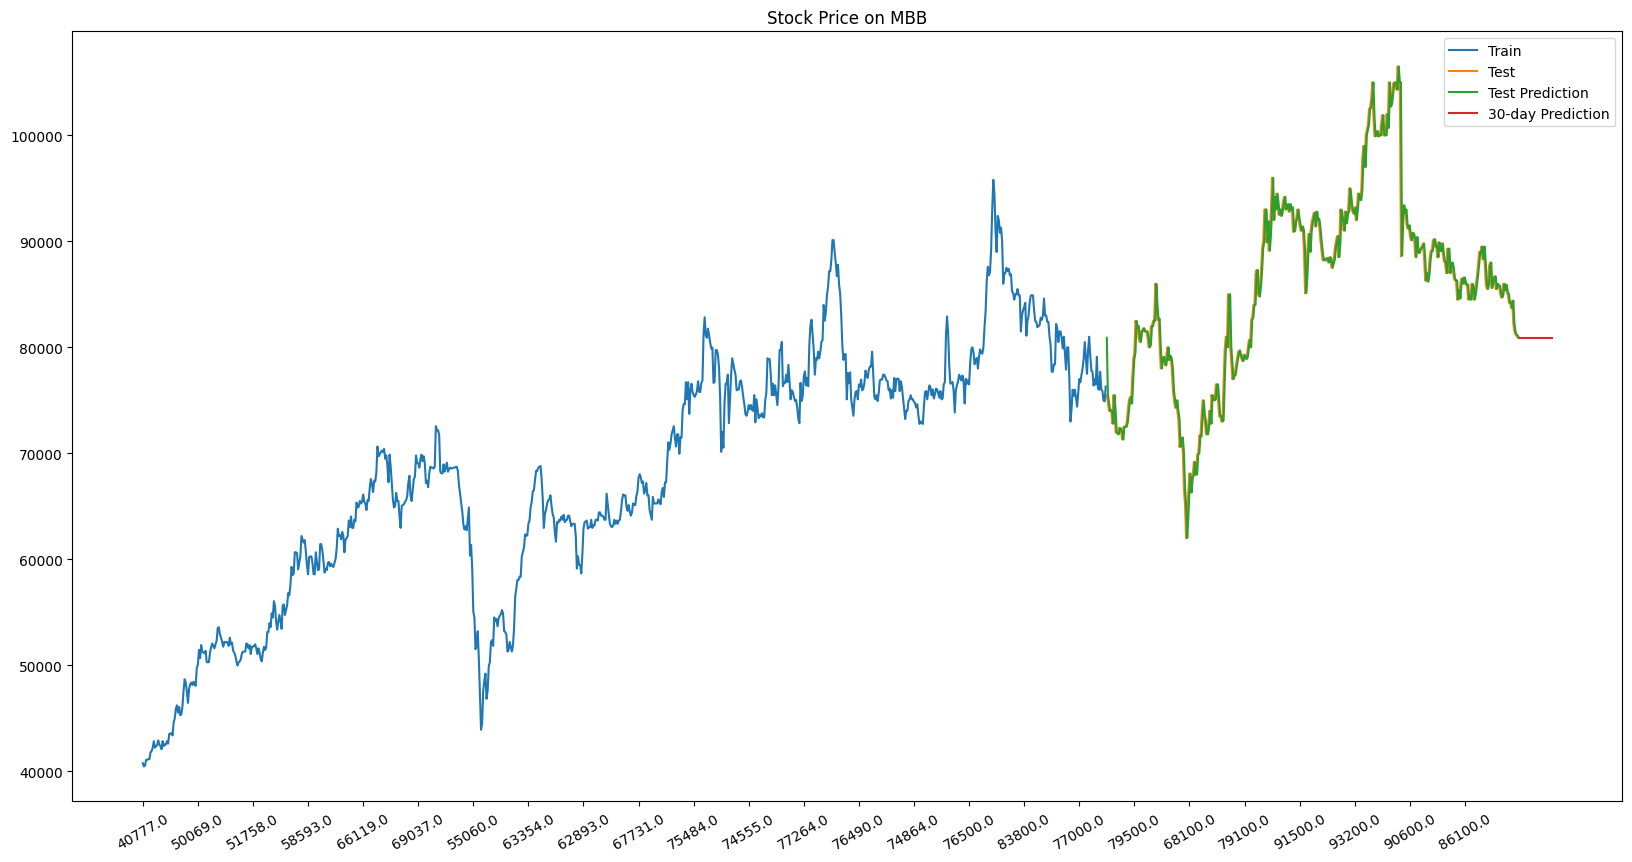

In [166]:
#ve do thi
#tao index

df_test = df_test.reset_index(drop=True)
#tao index cho train, test
index_train = np.arange(0,train_size,1)

index_test = np.arange(train_size,train_size+test_size,1)
#tao index cho predict

index_predict_test = np.arange(train_size,train_size+test_size,1)
index_predict_next_30_days = np.arange(last_index+1,last_index+31,1)

#chinh kich thuoc do thi
plt.figure(figsize=(20,10))
plt.title('Stock Price on MBB')
plt.plot(index_train,df_train,label='Train')
plt.plot(index_test,df_test,label='Test')
plt.plot(index_predict_test,predict_test,label='Test Prediction')
plt.plot(index_predict_next_30_days,next_30_days,label='30-day Prediction')
plt.xticks(np.arange(0, len(df1), 50), data['Price'][0:len(data):50])
plt.xticks(rotation=30) #Xoay nhan 30 do
plt.legend(loc='best')
plt.show()
